<a href="https://colab.research.google.com/github/greapis/jaeha-shim/blob/main/Fourth%20ML%20model(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## 컨볼루션을 통한 컴퓨터 비전의 정확성 개선

# 이제 심층 신경망(DNN)을 사용하여 입력 레이어(입력 데이터 모양)와
# 히든 레이어의 세 가지 레이어로 구성된 패션 이미지 인식을 수행하는 방법을 알게 되었습니다.

# 히든 레이어의 크기, 학습 세대의 수와 같이 최종 정확성에 영향을 주는 여러 매개변수를 실험했습니다.

# 편의를 위해 전체 코드를 다시 보내드립니다. 이를 실행하고 끝에 출력된 테스트 정확성을 기록해 둡니다.

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

# 컨볼루션을 사용하면 이미지의 내용을 좁혀 구체적인 세부정보에 초점을 맞출 수 있습니다.

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5019 - accuracy: 0.8237
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3735 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3370 - accuracy: 0.8755
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3137 - accuracy: 0.8852
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3421 - accuracy: 0.8778
Test loss: 0.34208306670188904, Test accuracy: 87.77999877929688


In [3]:
## 3. 코드 사용해 보기
# 다음 코드를 실행합니다. 이전의 신경망과 동일하지만 이번에는 컨볼루셔널 레이어가 먼저 추가됩니다.
# 시간이 좀 더 걸리지만 정확성에 미치는 영향을 살펴봅니다.


import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

# 학습 데이터에 대해 약 93%, 검증 데이터에서 약 91% 의 상승 효과를 보였습니다.

# 이제 더 많은 에포크 동안(예: 20개 정도) 결과를 실행해 보세요.
# 학습 결과는 매우 좋아 보일 수 있지만 과적합이라는 현상으로 인해 유효성 검사 결과가 실제로 낮아질 수 있습니다.

2.15.0
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)       

In [4]:
## 4. 데이터 수집
# 첫 번째 단계는 데이터를 수집하는 것입니다.

# 여기서 달라진 부분과 학습 데이터를 다시 구성하는 데 필요한 학습 데이터가 있음을 알 수 있습니다.
# 첫 번째 컨볼루션에서는 모든 것을 포함하는 단일 텐서가 예상되므로,
# 목록에 있는 20x28x1 항목 60,000개 대신 60,000x28x28x1인 테스트용 단일 4D 목록이 있습니다.
# 이렇게 하지 않으면 컨볼루션이 모양을 인식하지 못하므로 학습할 때 오류가 발생합니다.


import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_image, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)
training_image = training_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

## **5. 모델 정의**

다음으로 모델을 정의합니다.
상단의 입력 레이어 대신 컨볼루셔널 레이어를 추가합니다. 사용할 수 있는 매개변수는 다음과 같습니다.



*  생성하려는 컨볼루션의 수입니다. 32와 같은 값은 좋은 출발점입니다.
*  컨볼루셔널 행렬의 크기(이 경우 3x3 그리드)


*  사용할 활성화 함수입니다. 이 경우에는 relu를 사용합니다.
*  첫 번째 레이어에서 입력 데이터의 모양입니다.


컨볼루션에서 이어지는 컨볼루션입니다. 컨볼루션에서 강조된 특징의 콘텐츠를 유지하면서 이미지를 압축하도록 설계된 최대 풀링 레이어가 있습니다. 최대 풀링에 최대 (2,2)를 지정하면 이미지 크기가 4의 배수로 감소하는 효과가 있습니다. 2x2 픽셀의 배열과 가장 큰 픽셀 값을 선택하여 4픽셀을 1로 변환합니다. 이미지 전체에 걸쳐 이 계산을 반복하므로 가로 픽셀 수를 절반으로 줄이고 세로 픽셀 수는 절반으로 줄입니다.


model.summary()를 호출하여 네트워크의 크기와 모양을 확인할 수 있습니다. 모든 최대 풀링 레이어 후에 이미지 크기가 다음과 같이 감소합니다.





In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [6]:
# CNN의 전체 코드는 다음과 같습니다.

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Add another convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Now flatten the output. After the you will just have the same DNN structure as the non convolutional version
    tf.keras.layers.Flatten(),
    # The same 128 dense layers, and 10 output layers as in the pre-convolution example:
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


**6. 모델 컴파일 및 학습**

모델을 컴파일하고 적합성 메서드를 호출하여 학습을 진행하고 테스트 세트에서 손실 및 정확성을 평가합니다.

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))


# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(training_images, training_labels, epochs=5)
# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))

Epoch 1/5
1875/1875 [==============================] - 54s 28ms/step - loss: 0.4445 - accuracy: 0.8376
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3005 - accuracy: 0.8903
Epoch 3/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2556 - accuracy: 0.9050
Epoch 4/5
1875/1875 [==============================] - 65s 34ms/step - loss: 0.2227 - accuracy: 0.9170
Epoch 5/5
313/313 [==============================] - 4s 11ms/step - loss: 0.2756 - accuracy: 0.9014
Test loss: 0.27558115124702454, Test accuracy: 90.14000296592712


**7. 컨볼루션 및 풀링 시각화**


이 코드는 컨볼루션을 그래픽으로 보여줍니다. print (test_labels[:100])는 테스트 세트의 처음 100개 라벨을 나타내며 색인 0, 색인 23 및 색인 28의 라벨이 모두 동일한 값 (9)이라는 것을 확인할 수 있습니다. 모든 신발이요. 각각에서 컨볼루션을 진행한 결과를 살펴보겠습니다. 각 컨볼루션에서 공통 특성이 나타나기 시작합니다. DNN은 이 데이터에 대해 학습할 때 더 적은 정보로 학습하며 컨볼루션 및 풀링 조합에 따라 신발 간에 공통점을 찾을 수 있습니다.

In [8]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


이제 이러한 라벨에 해당하는 이미지 중 일부를 선택하고 컨볼루션을 거치는 동안 이러한 이미지를 렌더링할 수 있습니다. 따라서 다음 코드에서 FIRST_IMAGE, SECOND_IMAGE, THIRD_IMAGE는 모두 발목 부츠 9의 색인입니다.

1/1 [==============================] - 0s 24ms/step


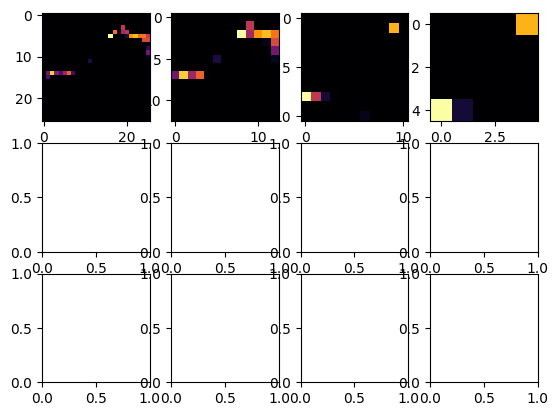

In [12]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0, 4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)


# for x in range(0,4):
#   f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
#   axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
#   axarr[0,x].grid(False)
#   f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
#   axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
#   axarr[1,x].grid(False)
#   f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
#   axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
#   axarr[2,x].grid(False)